<a href="https://colab.research.google.com/github/dragon222001/Internship_Project/blob/master/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Welcome** **to** **the** **Project** **code**! 


Made by Saurabh Datta

**Project**: We are provided with a datset of various information of the users of the bank and we have to predict that how many users are more probable to take a loan from the bank as the bank wants to increase its loan takers and assets.

**Goal:** to make prediction regarding most probable customers who are likely to take loan from the bank.

For accessing the program further, first you will be required to upload the file. So, follow these steps:

1.   Go to the Git Hub Repository and download the file 'Bank_Personal_Loan_Modelling'
2.   Upload the file in the upload section given in the menu and submenu 'Files'.
3. Now, you're ready to run the code. 



**Step 1: Uploading the main libraries.**

In [742]:
#Uploading the libraries
import pandas as pd             #It is used to access and use the dataset
import numpy as np              #It is used to do array operations
import matplotlib.pyplot as plt #It is used to plot graphs and view them
import seaborn as sns           #It is used to plot heatmap graph which is used to see result accuracy in graphical manner

**Step** **2: Accessing the Dataset.** 

In [743]:
#Accessing the Dataset
dataset = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data') #It assigns the values to the variable

**Step 3: Viewing basic information about the Dataset**

In [744]:
#Viewing the information regarding the columns, null values(if any), etc.
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


So, it means we have 5000 entries in each of the columns so let us proceed.

In [745]:
#Number of Null values in the data:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

So, it means that we have got no null values.

In [746]:
#Viewing the information regarding the first 10 data entries just for verification.
dataset.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


So, we have seen a slice how our data looks like.

In [747]:
#Viewing Statistical information regarding the data, ex:Mean, etc.
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We have seen the statistical information about the data. In this it shows experience has negative value i.e., minimum is -3.

In [748]:
#Viewing the number of rows and columns for verification.
print(dataset.shape)

(5000, 14)


Hence, it is clear that our data has no null values and it consists of 5000 Rows and 14 Columns. But, one of the columns 'Experience' has faulty data i.e., it has negative value but it doesn't make any sense. So, we need to find a variable which is related to it, most probably age should be related to experience. And ID is not needed for the model as it will not effect the prediction.

**Step 4: Cleaning the Data**

Now, let us see the relation between Age and Experience.

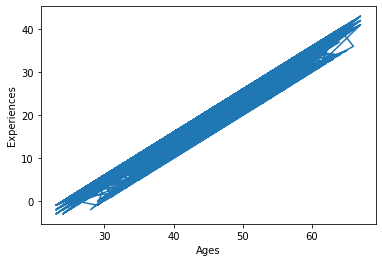

In [749]:
#Extracting Experience and Age and storing to variables
ages = dataset['Age']
experiences = dataset['Experience']

#Plotting Line graph between the two.
plt.plot(ages,experiences)
plt.xlabel('Ages')
plt.ylabel('Experiences')
plt.show()

It is clearly visible that both are correlated. So, now let's check the degree of Correlation.

In [750]:
#Checking Correlation
correlation = experiences.corr(ages)
print(correlation)

0.9942148569683321


So, it is clearly indicated that both are highly correlated. So, we can remove the experience column as it will not make any difference until age is there. Moreover, it had faulty data. ID also needs to be dropped but let's retain it till graph plotting, afterwards, before model creation, we will  remove it as well. 

In [751]:
#Dropping Experience Column
dataset = dataset.drop(['Experience'], axis = 1)

In [752]:
dataset

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0


So, we have removed the experience column and are ready to proceed.

**Step 5: Information regarding the columns, such as unique values, others**

In [753]:
#Number of Unique values in the columns
dataset.nunique()

ID                    5000
Age                     45
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

It will not be meaningful to view the value counts of unique values of Income, CCAvg, Mortgage and Zipcode as they have many unique values as clearly visible but we will be seeing their graphical distribution after all other fields.

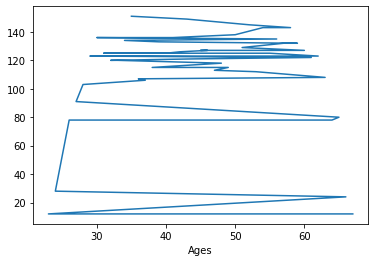

In [754]:
#Count of each type of unique values in columns
plt.plot(dataset['Age'].value_counts())
plt.xlabel('Ages')
plt.show()

In [755]:
dataset['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

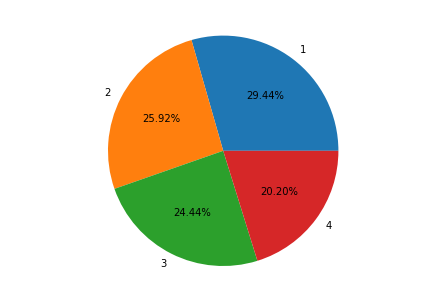

In [756]:
#Pie chart Representation of Family unique values and counts
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1','2','3','4']
ax.pie(dataset['Family'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

So, maximum number of our customers live alone.

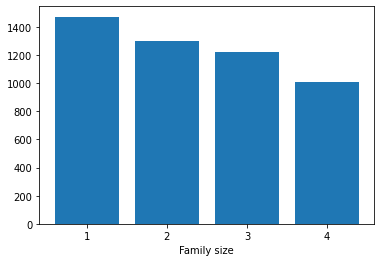

In [757]:
#Viewing this distribution in Bar Graph

plt.bar(label, dataset['Family'].value_counts())
plt.xlabel('Family size')
plt.show()

In [758]:
#Now seeing unique value counts of Education in which 1: Undergraduate, 2: Graduate, 3: Advanced/Professional
dataset['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

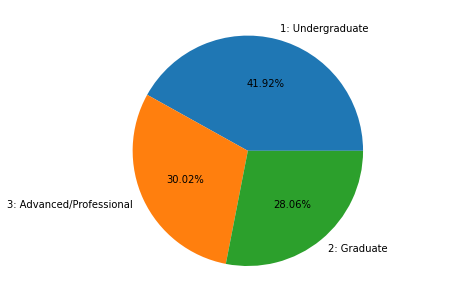

In [759]:
#Now seeing the Pie Chart of this distributuion
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1: Undergraduate','3: Advanced/Professional','2: Graduate']
ax.pie(dataset['Education'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

So, maximum number of our customers are undergraduates.

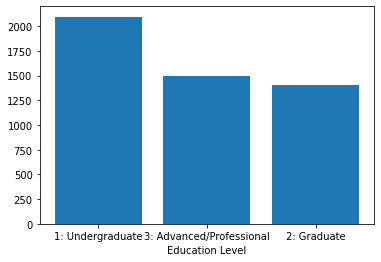

In [760]:
#Viewing the bar graph representation of this distribution
plt.bar(label, dataset['Education'].value_counts())
plt.xlabel('Education Level')
plt.show()

In [761]:
#Viewing Value Count of Previous Loan Taken, 0: No, 1: Yes
dataset['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

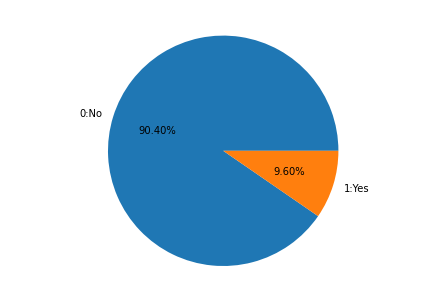

In [762]:
#Viewing this distribution in Pie Chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(dataset['Personal Loan'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

So, only 9.6% of the customers took loan last time.

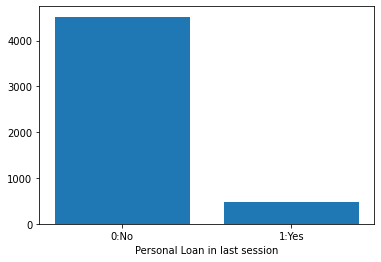

In [763]:
#Viewing this distribution in bar graph
plt.bar(label, dataset['Personal Loan'].value_counts())
plt.xlabel('Personal Loan in last session')
plt.show()

In [764]:
#Viewing the distribution of Whether the customer has a security account with the bank, 1:yes, 0:no
dataset['Securities Account'].value_counts() 

0    4478
1     522
Name: Securities Account, dtype: int64

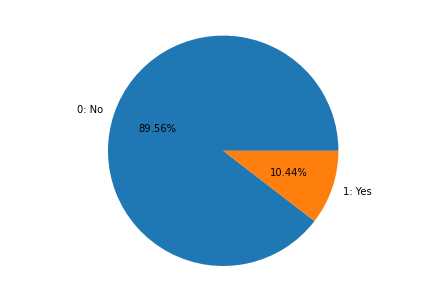

In [765]:
#Viewing Pie Chart of this distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0: No', '1: Yes']
ax.pie(dataset['Securities Account'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

So, only 10.44% of our customers have security accounts.

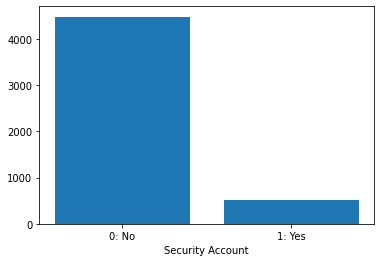

In [766]:
#Viewing the bar graph of this distribution
plt.bar(label, dataset['Securities Account'].value_counts())
plt.xlabel('Security Account')
plt.show()

In [767]:
#Viewing the distribution of whether the customer has a CD Account with the bank, 0:No, 1:Yes
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

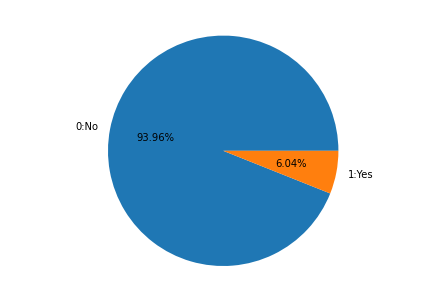

In [768]:
#Viewing the pie chart of this distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(dataset['CD Account'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

So, 6.04% customers have certificate of deposit accounts.

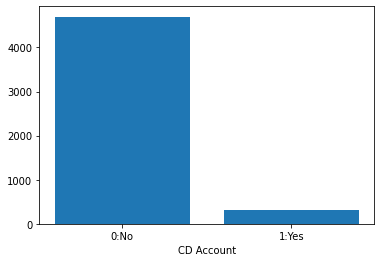

In [769]:
#Viewing the Bar Chart of this distribution
plt.bar(label,dataset['CD Account'].value_counts())
plt.xlabel('CD Account')
plt.show()

In [770]:
#Viewing the distribution of whether the customer uses online banking, 0:no, 1:yes
dataset['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

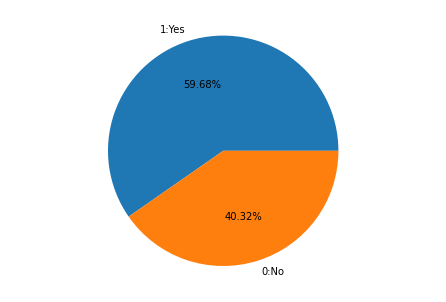

In [771]:
#Viewing the Pie Chart Representation of this data.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1:Yes','0:No']
ax.pie(dataset['Online'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()


So, majority of our customers i.e., 59.68% use online facilities.

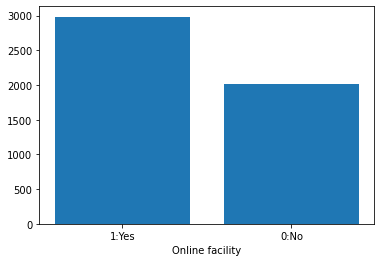

In [772]:
#Viewing the bar chart representation of this data
plt.bar(label, dataset['Online'].value_counts())
plt.xlabel('Online facility')
plt.show()

In [773]:
#Viewing the distribution whether a person uses a Credit Card by Universal Bank, 0:No, 1:Yes
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

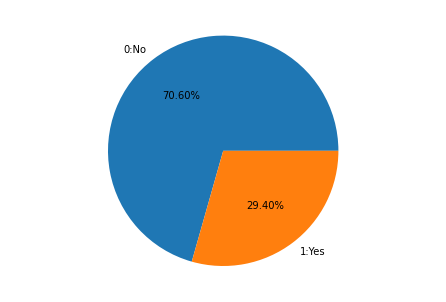

In [774]:
#Viewing the Pie Chart Representation of this data.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(dataset['CreditCard'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

So, only 29.4% users have creditcard issued by Universal Bank.

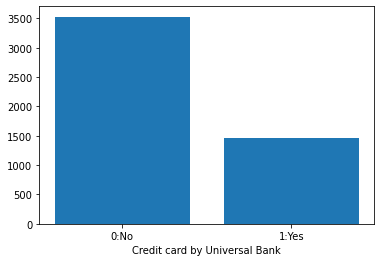

In [775]:
#Viewing Bar Chart Representation of this data
plt.bar(label, dataset['CreditCard'].value_counts())
plt.xlabel('Credit card by Universal Bank')
plt.show()

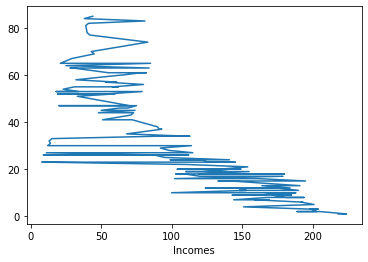

In [776]:
#Viewing the distribution related to Income through Graph
plt.plot(dataset['Income'].value_counts())
plt.xlabel('Incomes')
plt.show()

So, it is visible that as income increases, number of customers decrease.

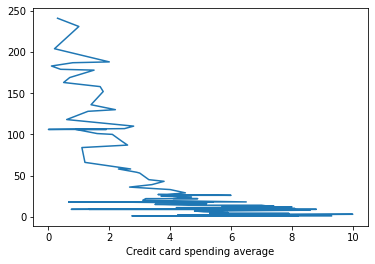

In [777]:
#Viewing the distribution related to Average Credit Card Spending per Month
plt.plot(dataset['CCAvg'].value_counts())
plt.xlabel('Credit card spending average')
plt.show()

So, many users have low credit card spending average per month.

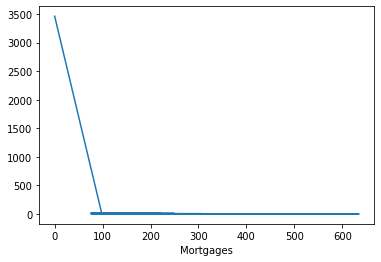

In [778]:
#Viewing the distribution of Mortgage 
plt.plot(dataset['Mortgage'].value_counts())
plt.xlabel('Mortgages')
plt.show()

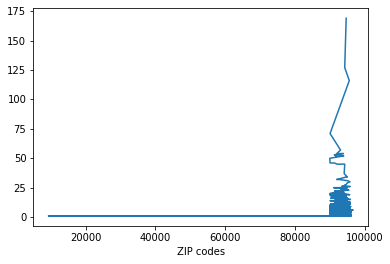

In [779]:
#Viewing the distribution of Zipcodes
plt.plot(dataset['ZIP Code'].value_counts())
plt.xlabel('ZIP codes')
plt.show()

Now, let us see the customers with zero mortgage.

In [780]:
y_mor = 0
for x_mor in dataset['Mortgage']:
  if x_mor == 0:
    y_mor+=1
print(y_mor)

3462


So, 3462 customers have zero mortgage.

Now, let us see number of users with zero credit card spending.

In [781]:
y_CC = 0
for x_CC in dataset['CCAvg']:
  if x_CC == 0:
    y_CC+=1
print(y_CC)

106


So, 106 customers have zero credit card spending average per month.

Now, that we have seen the distribution of the data, let us see the relation and analysis.

**Step 5: Viewing the Graphical Representation of the Data.**

In [782]:
#Extracting ID's of the customer and storing in a variable to use it for plotting with other fields
ids = dataset['ID']

   (i) Graphical Representation of Ages of the customers.

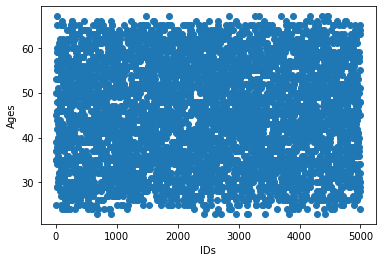

In [783]:

#Plotting Scatter Plot
plt.scatter(ids,ages)
plt.xlabel('IDs')
plt.ylabel('Ages')
plt.show()

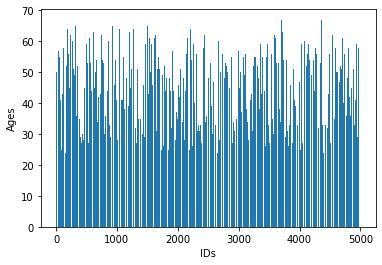

In [784]:
#Plotting Bar Graph
plt.bar(ids,ages)
plt.xlabel('IDs')
plt.ylabel('Ages')
plt.show()

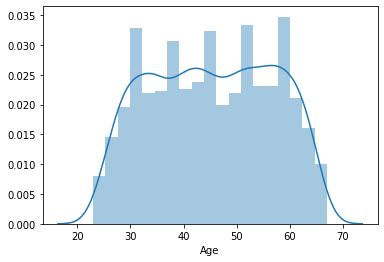

In [785]:
#Plotting variance of age
sns.distplot(ages)
plt.show()

It seems a normal curve.

(ii) Graphical Representation of incomes of customers

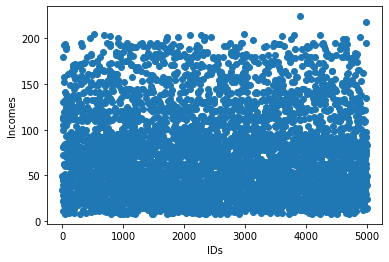

In [786]:
#Extracting the incomes of customers and saving it to a variable.
incomes = dataset['Income']

#Plotting Scatter Plot
plt.scatter(ids, incomes)
plt.xlabel('IDs')
plt.ylabel('Incomes')
plt.show()

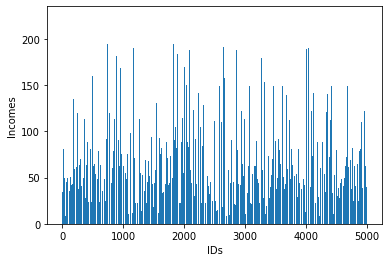

In [787]:
#Plotting the Bar Graph
plt.bar(ids, incomes)
plt.xlabel('IDs')
plt.ylabel('Incomes')
plt.show()

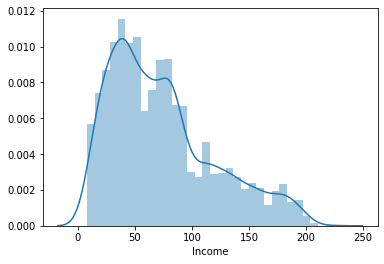

In [788]:
#Variance of incomes
sns.distplot(incomes)
plt.show()

So, it seems to be skewed.

(iii) For Zipcodes

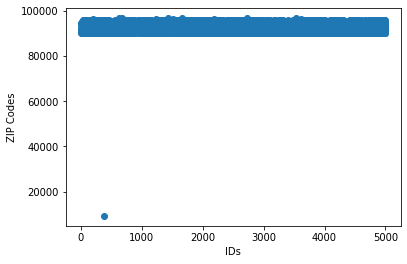

In [789]:
#Extracting Zipcodes and saving in a variable
zipcodes= dataset['ZIP Code']

plt.scatter(ids,zipcodes)
plt.xlabel('IDs')
plt.ylabel('ZIP Codes')
plt.show()

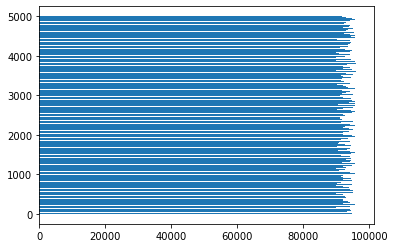

In [790]:
#Plotting Horizontal Bar Graph
plt.barh(ids,zipcodes)
plt.show()

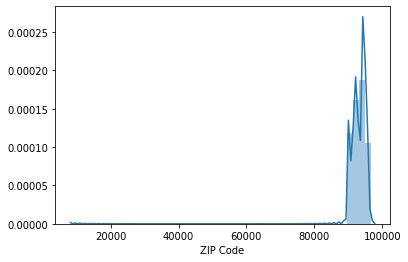

In [791]:
#Variance
sns.distplot(zipcodes)
plt.show()

(iv) Family size

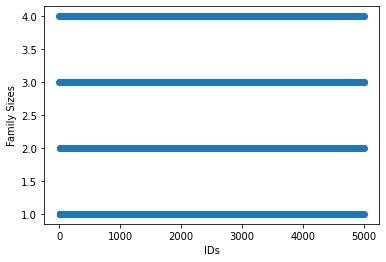

In [792]:
#Extracting Family members and saving to a variable.
families = dataset['Family']

#Plotting Scatter Plot
plt.scatter(ids, families)
plt.xlabel('IDs')
plt.ylabel('Family Sizes')
plt.show()

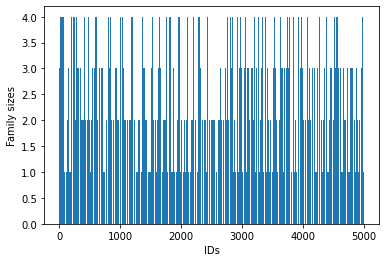

In [793]:
#Plotting Bar Graph
plt.bar(ids, families)
plt.xlabel('IDs')
plt.ylabel('Family sizes')
plt.show() 

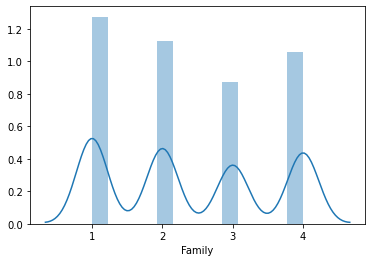

In [794]:
#Variance
sns.distplot(families)
plt.show()

(v) Graphical Representation of Average spendings of customers monthly using credit card.

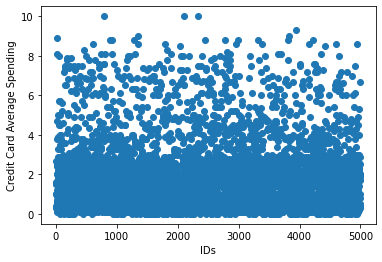

In [795]:
#Extracting the values to a variable.
ccavgs = dataset['CCAvg']

#Plotting Scatter Plot
plt.scatter(ids, ccavgs)
plt.xlabel('IDs')
plt.ylabel('Credit Card Average Spending')
plt.show()

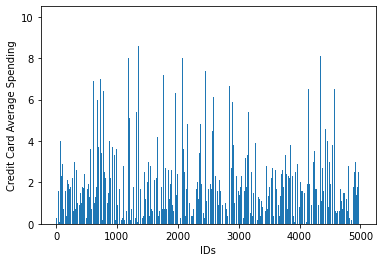

In [796]:
#Plotting Bar Graph
plt.bar(ids, ccavgs)
plt.xlabel('IDs')
plt.ylabel('Credit Card Average Spending')
plt.show()

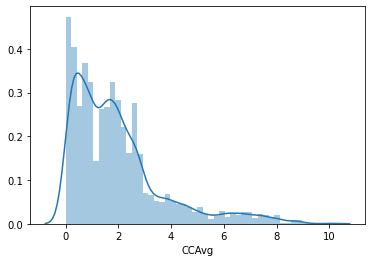

In [797]:
sns.distplot(ccavgs)
plt.show()

It too apears skewed.

(vi) Education levels

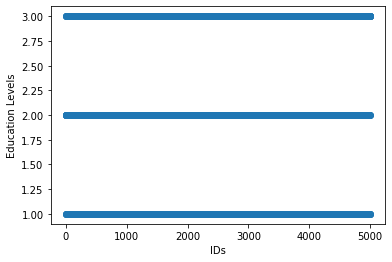

In [798]:
#Extracting Education levels and storing in a variable
educations = dataset['Education']

plt.scatter(ids,educations)
plt.xlabel('IDs')
plt.ylabel('Education Levels')
plt.show()

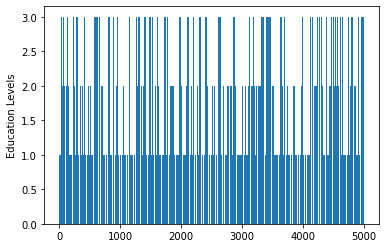

In [799]:
plt.bar(ids,educations)
plt.ylabel('Education Levels')
plt.show()

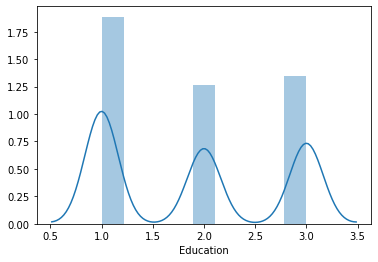

In [800]:
sns.distplot(educations)
plt.show()

(Vii) Mortgages

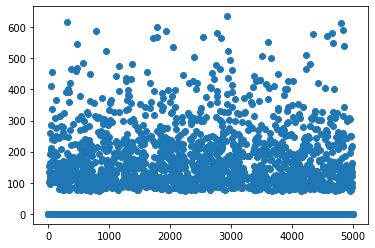

In [801]:
#Extracting mortgages and saving in a variable
mortgages = dataset['Mortgage']

plt.scatter(ids, mortgages)
plt.show()

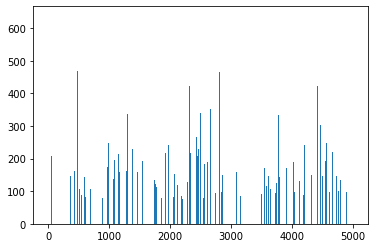

In [802]:
plt.bar(ids,mortgages)
plt.show()

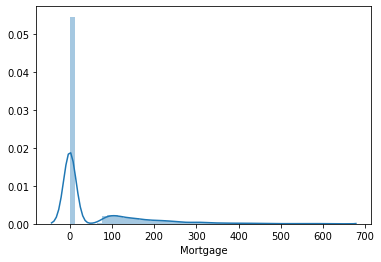

In [803]:
sns.distplot(mortgages)
plt.show()

(viii) Personal Loan

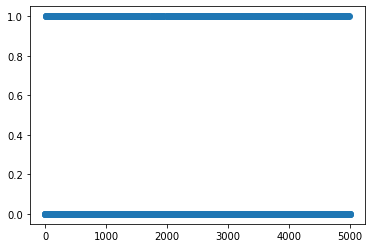

In [804]:
#Extracting whether the person took a loan to a variable
loans= dataset['Personal Loan']

plt.scatter(ids,loans)
plt.show()

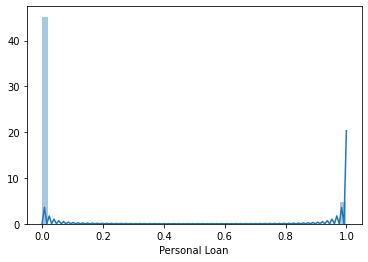

In [805]:
sns.distplot(loans)
plt.show()

(ix) Security account

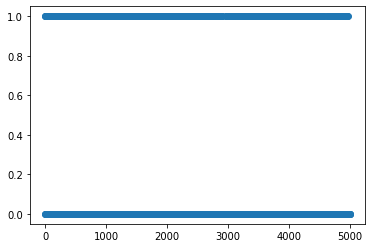

In [806]:
#Extracting whether person has security account with bank to a variable
securities = dataset['Securities Account']

plt.scatter(ids,securities)
plt.show()

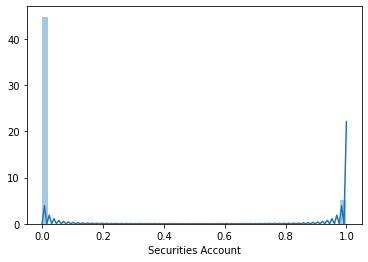

In [807]:
sns.distplot(securities)
plt.show()

(x) CD Account

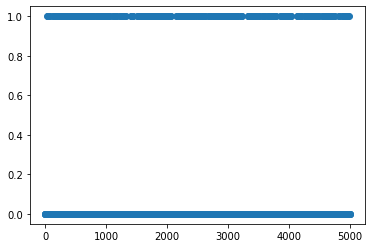

In [808]:
#Extracting whether customer has CD Account or not to a variable
cdaccs= dataset['CD Account']

plt.scatter(ids, cdaccs)
plt.show()

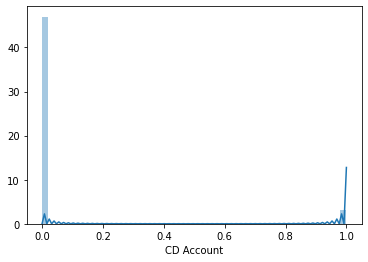

In [809]:
sns.distplot(cdaccs)
plt.show()

(xi) Online Facility

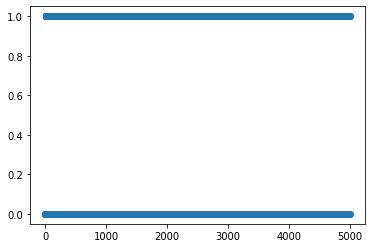

In [810]:
#Extracting whether customer uses online facilities to a variable
onlines = dataset['Online']

plt.scatter(ids,onlines)
plt.show()

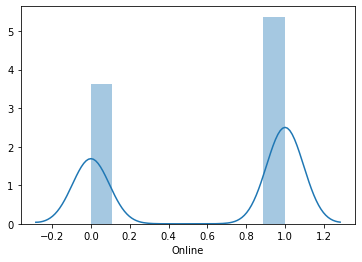

In [811]:
sns.distplot(onlines)
plt.show()

(xii) Credit card by Universal Bank

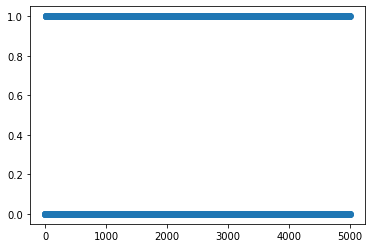

In [812]:
#Extracting whether user has Credit Card issued by Universal Bank
creditcards = dataset['CreditCard']

plt.scatter(ids,creditcards)
plt.show()

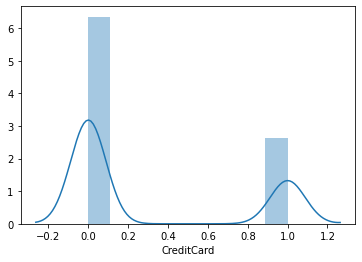

In [813]:
sns.distplot(creditcards)
plt.show()

Based on the above observations, we can conclude that certain fields need to be processed before use.



Now, let us see the relational graphs between variables which may be related.

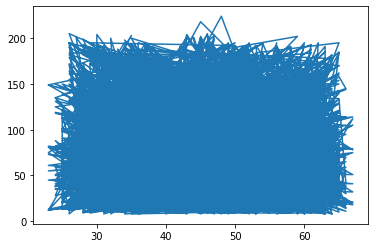

In [814]:
#Relation between age and income
plt.plot(ages,incomes)
plt.show()

So, it is clear that they are not related.

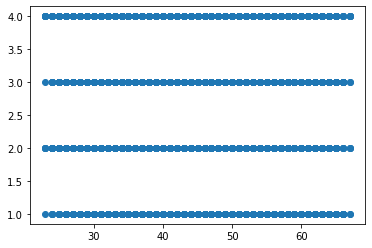

In [815]:
#Relation between age and family size
plt.scatter(ages,families)
plt.show()

They too are not related.

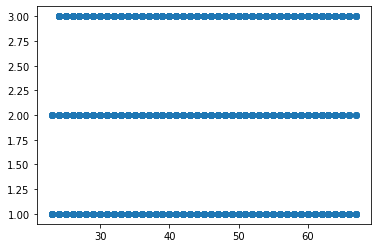

In [816]:
#Relation between age and education
plt.scatter(ages,educations)
plt.show()

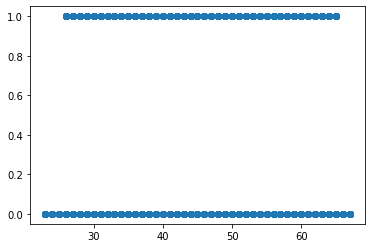

In [817]:
#Relation between Age and Personal Loan
plt.scatter(ages,loans)
plt.show()

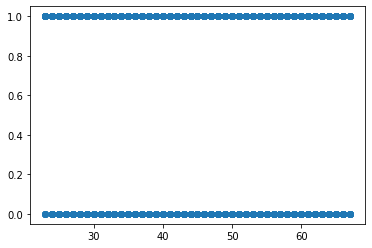

In [818]:
#Relation between Age and Online facilities
plt.scatter(ages,onlines)
plt.show()

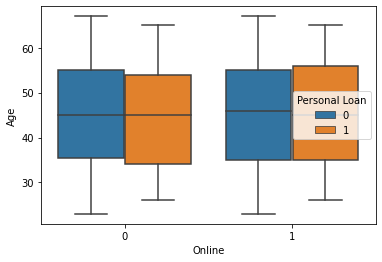

In [819]:
sns.boxplot(x='Online', y='Age',hue='Personal Loan',data=dataset)
plt.show()

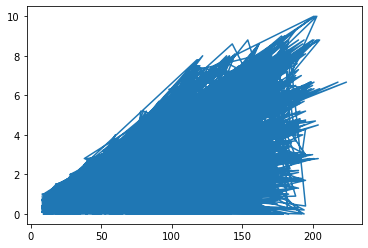

In [820]:
#Relation between Income and Average spending
plt.plot(incomes,ccavgs)
plt.show()

They seem to be related to some extent.

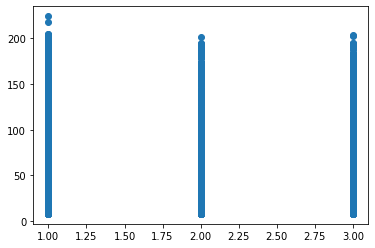

In [821]:
#Relation between Income and Education
plt.scatter(educations,incomes)
plt.show()

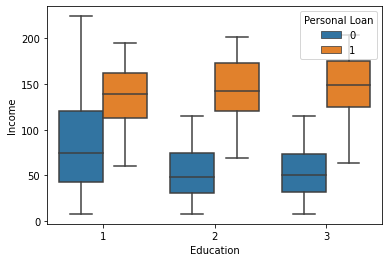

In [822]:
sns.boxplot(x='Education', y='Income',hue='Personal Loan',data=dataset)
plt.show()

So, it is visible that people with high education and high income tend to be more probable in taking loan.

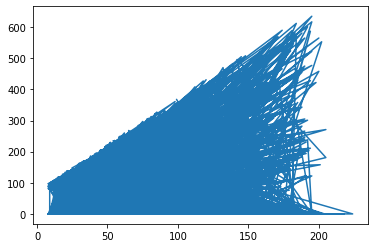

In [823]:
#Relation between Income and Mortgage value
plt.plot(incomes,mortgages)
plt.show()

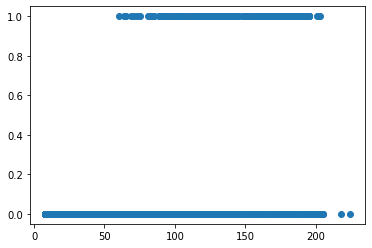

In [824]:
#Relation between Income and Personal Loan
plt.scatter(incomes,loans)
plt.show()

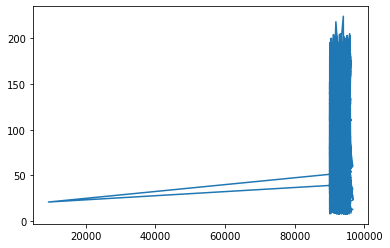

In [825]:
#Relation between Zip codes and incomes
plt.plot(zipcodes,incomes)
plt.show()

Zipcode does seem to have an outlier but since it is a nominal data, it cannot be considered an outlier, so we will have to look about its scope.

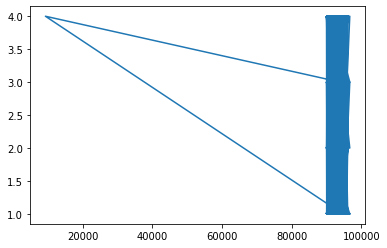

In [826]:
#Relation between zipcodes and family size
plt.plot(zipcodes,families)
plt.show()

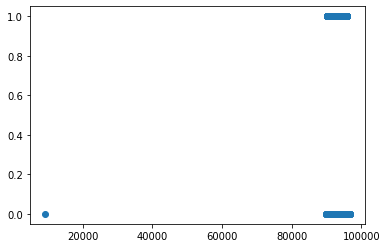

In [827]:
#Plotting relation between zipcode and loan
plt.scatter(zipcodes,loans)
plt.show()

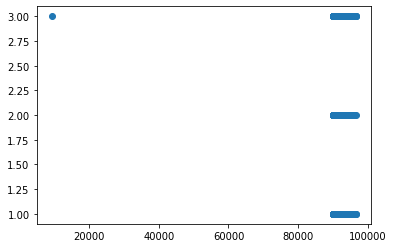

In [828]:
#Relation between zipcode and education
plt.scatter(zipcodes,educations)
plt.show()

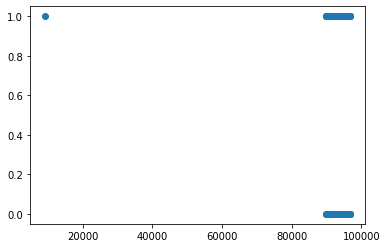

In [829]:
#Relation between zipcode and online
plt.scatter(zipcodes,onlines)
plt.show()

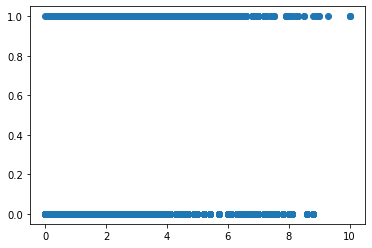

In [830]:
#Relation between average credit card spending per month and loan
plt.scatter(ccavgs,loans)
plt.show()

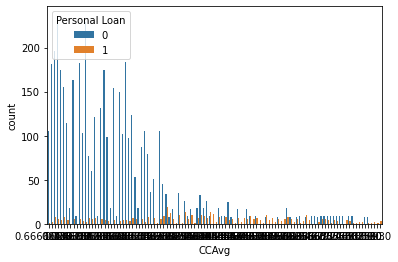

In [831]:
sns.countplot(x='CCAvg',hue='Personal Loan',data=dataset)
plt.show()

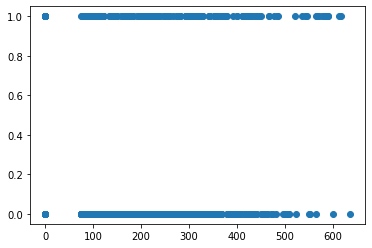

In [832]:
#Relation between mortgages and loan
plt.scatter(mortgages,loans)
plt.show()

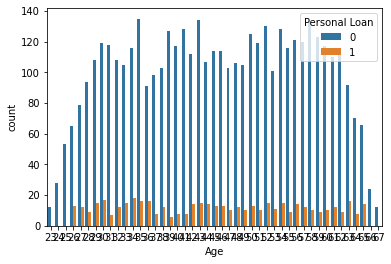

In [833]:
#Relation between Ages and loans
sns.countplot(x='Age',hue='Personal Loan',data=dataset)
plt.show()

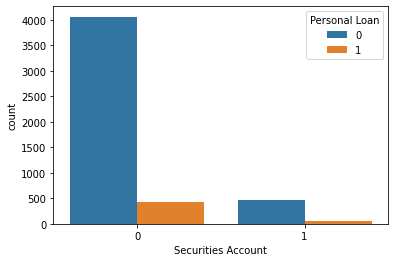

In [834]:
#Relation between security account and Loan
sns.countplot(x='Securities Account',hue='Personal Loan',data=dataset)
plt.show()

It is visible that people with security accounts tend less to take loans.

Now, let us plot the correlations plot between variables to check correlativity which we may have not been able to identify.

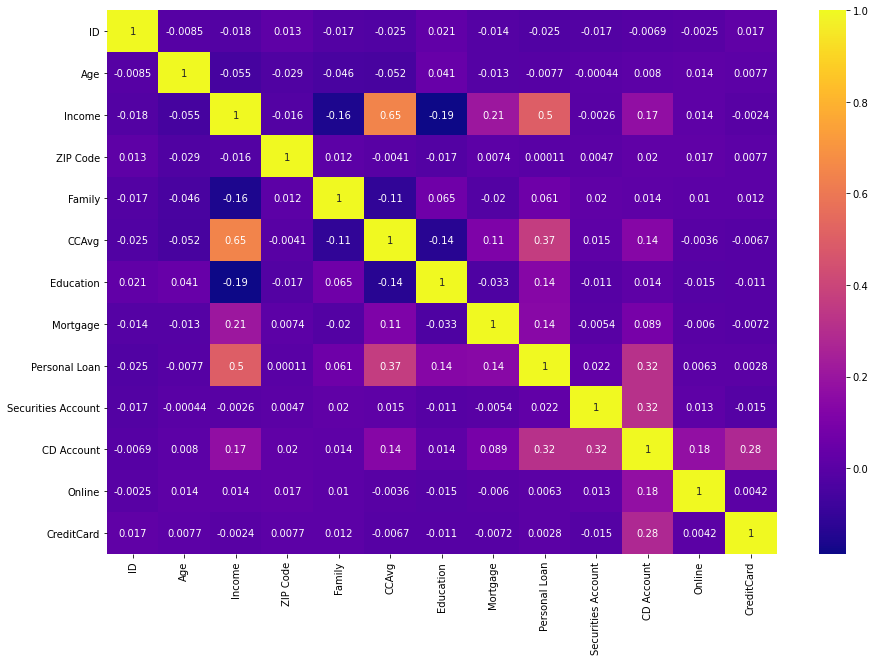

In [835]:
#Correlations Plot
fig.ax=plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='plasma',annot=True)
plt.show()

It is visible that none of our variables except income and Credit card average are much correlated.

So, we have seen relations between various datas.

**Step 6: Preprocessing of Data**

Before the data can be used, we need to do some necessary stransformations to the data. For example, we need to remove the data of zipcodes as it is nominal data and has too many types so it can effect the predictions.

In [836]:
#Dropping ID's
dataset = dataset.drop(['ID'], axis=1)
dataset

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


In [837]:
#Dropping Zipcodes
dataset = dataset.drop(['ZIP Code'], axis=1)
dataset

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


Now, that our data has been gotten rid of less useful fields, let us proceed further and also let us apply various transformations.

**Step 7:Extracting Target and Training Variable**

Now, let us extract Training variable (X) and Target Variable (Y)

In [838]:
X=dataset.loc[:,dataset.columns != 'Personal Loan']
Y=dataset[['Personal Loan']]


In [839]:
X

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0


In [840]:
Y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


**Step 8: Normalization of Data**

Now, that we have preprocessed the data, it requires to be normalized which means to covert the data into its equivalent form of normal data so that it increases the accuracy of our predictions. 
I tried boxcox and yeo-johnson method of normalization and found the latter to be better. Hence, we will be using it. And we will be using label encoding on Mortgage to transform it as it seems highly skewed.

In [841]:
#Normalising Income
from sklearn.preprocessing import PowerTransformer
pt_inc = PowerTransformer(method='yeo-johnson',standardize=False)
pt_inc.fit(X['Income'].values.reshape(-1,1))
temp_Inc = pt_inc.transform(X['Income'].values.reshape(-1,1))
X['Income'] = temp_Inc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


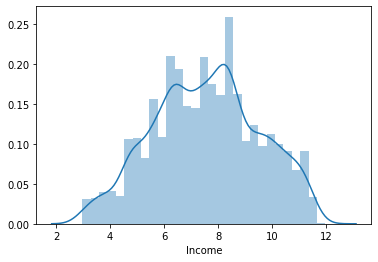

In [842]:
sns.distplot(X['Income'])
plt.show()

Now, Income does look normalized and ready for use.

In [843]:
#Normalizing Credit Card Average
pt_cc = PowerTransformer(method='yeo-johnson',standardize=False)
pt_cc.fit(X['CCAvg'].values.reshape(-1,1))
temp_CC = pt_cc.transform(X['CCAvg'].values.reshape(-1,1))
X['CCAvg']=temp_CC

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


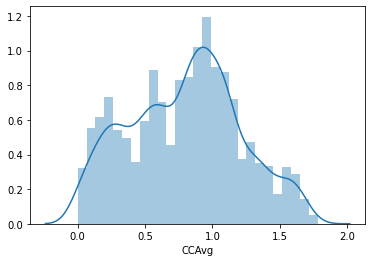

In [844]:
sns.distplot(X['CCAvg'])
plt.show()

Now, it too looks normalized and ready for use.

In [845]:
#Transforming Mortgage through Label Encoding
X['Mortgage_New']=pd.cut(X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
X.drop(['Mortgage'], axis=1, inplace=True)

In [846]:
X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
0,25,6.827583,4,0.845150,1,1,0,0,0,0
1,45,5.876952,3,0.814468,1,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,1,0


So now, Our data seems ready for use for predictions. So, let us proceed.

**Step 9: Splitting the data into training and test set**

In [847]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=0)

In [848]:
X_train

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
3789,51,5.058173,3,0.322048,1,0,0,1,1,0
758,64,5.948841,1,0.814468,2,1,0,0,0,0
2868,52,5.651776,4,0.902268,1,0,0,1,1,0
2550,32,4.661500,1,0.384643,3,0,0,1,0,1
2150,62,7.097040,1,0.544705,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3597,56,6.937650,3,0.954454,3,0,0,1,0,0
4670,52,11.394571,1,0.874376,1,0,0,1,0,0
988,63,5.728502,1,0.928929,2,0,0,0,0,0
2037,35,6.991517,2,0.633771,2,0,0,0,1,0


In [849]:
X_test

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
9,34,11.100150,1,1.722778,3,0,0,0,0,0
461,55,8.302424,2,1.271913,1,1,0,0,0,0
3700,48,9.831967,1,1.497486,1,1,0,0,0,0
1559,59,9.049404,4,1.162156,2,0,0,1,0,1
4558,44,8.341020,2,0.322048,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2180,58,6.414718,2,0.845150,3,0,0,1,0,0
3484,45,7.044639,3,1.067696,2,0,0,0,0,1
2965,53,5.651776,2,0.322048,3,0,0,0,1,1
2493,34,6.827583,1,1.067696,3,0,0,0,0,0


In [850]:
Y_train

,Personal Loan
3789,0
758,0
2868,0
2550,0
2150,0
...,...
3597,0
4670,0
988,0
2037,0


In [851]:
Y_test

,Personal Loan
9,1
461,0
3700,0
1559,1
4558,0
...,...
2180,0
3484,0
2965,0
2493,0


So, now our data has been split into training and test set which means we are good to go ahead.

**Step 10: Scaling the Data**

Now, that our data has been normalized and split into training and test sets, let us scale the data which in turn makes it easier for our model to understand it.

In [852]:
from sklearn.preprocessing import StandardScaler
sc_x_train = StandardScaler()
sc_x_train.fit_transform(X_train)

sc_x_test = StandardScaler()
sc_x_test.fit_transform(X_test)

array([[-1.02896547,  1.80508985, -1.21572118, ..., -1.27552743,
        -0.62567218, -0.48867186],
       [ 0.80680777,  0.36499165, -0.34899981, ..., -1.27552743,
        -0.62567218, -0.48867186],
       [ 0.19488336,  1.15230694, -1.21572118, ..., -1.27552743,
        -0.62567218, -0.48867186],
       ...,
       [ 0.63197222, -0.9994004 , -0.34899981, ..., -1.27552743,
         1.59828107,  0.68979725],
       [-1.02896547, -0.39416694, -1.21572118, ..., -1.27552743,
        -0.62567218, -0.48867186],
       [-0.06736996, -0.15105953,  0.51772157, ...,  0.78398941,
        -0.62567218, -0.48867186]])

**Step 11: Logistic Regression Model**

Now, we will be building Logistic regression model which predicts the result on basis of a threshold value on whose basis it classifies the data and make predictions. If you want to understand this model better, you can have a look at: https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression).

In [853]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0,max_iter=300)

In [854]:
#Fitting the data
log_reg.fit(X_train,Y_train['Personal Loan'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [855]:
#Making the predictions
Y_pred_LR = log_reg.predict(X_test)

In [856]:
#Accuracy Score of test set
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
acc_LR = accuracy_score(Y_pred_LR,Y_test)
acc_LR

0.9546666666666667

In [857]:
#Accuracy Score of training set
Y_pred_LR_train = log_reg.predict(X_train)
acc_LR_train = accuracy_score(Y_pred_LR_train, Y_train)
acc_LR_train

0.956

We have checked accuracy scores of Training and Test set because it shows us whether overfitting is present or not. And since, the values are quite close. Hence, they are not overfitted.

Accuracy score may not be a very reliable method in our case to identify our predictions. So, we will also be calculating roc score and other metrics measures.

Let us see the confusion matrix of our predictions first.

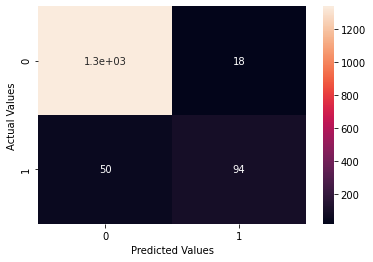

In [858]:
cm = confusion_matrix(Y_test, Y_pred_LR)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Though, it works fine. But, it has one problem that 53 of the values predicted by the model as false are actually true which means we will be losing the chance of contacting those customers. So, we will however also be looking at other models and hence, find a better model.

In [859]:
#Precision score
Pr_sc_LR = precision_score(Y_test, Y_pred_LR)
Pr_sc_LR

0.8392857142857143

So, it is pretty well precision score but again other models may possess more.

In [860]:
#Recall score
Rs_LR = recall_score(Y_test,Y_pred_LR)
Rs_LR

0.6527777777777778

In [861]:
#F1 score
F1_LR = f1_score(Y_test,Y_pred_LR)
F1_LR

0.734375

In [862]:
#Roc Area under curve score
R_Ar_LR = roc_auc_score(Y_test,Y_pred_LR)
R_Ar_LR

0.819751720747296

These values are fine but we will look for better models.

**Step 12: Building Other Models**

**(i) Perceptron Model**

It is a very basic model based on linear method which is also used to classify results. To understand better, kindly have a look at: https://en.wikipedia.org/wiki/Perceptron

In [863]:
#Building model
from sklearn.linear_model import Perceptron
perce = Perceptron(random_state=0)

In [864]:
#Fitting the model with training set
perce.fit(X_train,Y_train['Personal Loan'])

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [865]:
#Predicting the model with test set
Y_pred_P = perce.predict(X_test)

In [866]:
#Accuracy score of test set
acc_P = accuracy_score(Y_test,Y_pred_P)
acc_P

0.9173333333333333

In [867]:
#Accuracy of training set
Y_pred_P_train = perce.predict(X_train)
acc_P_train = accuracy_score(Y_train,Y_pred_P_train)
acc_P_train

0.9131428571428571

So, it is clear that data is not overfitted.

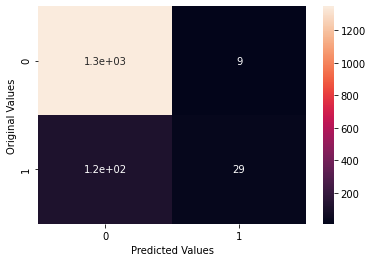

In [868]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_P)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

So, it is predicting a lot of values as false which our actually true so it is not much reliable and it would be much better to choose other models.

In [869]:
#Precision score
Pr_sc_P = precision_score(Y_test,Y_pred_P)
Pr_sc_P

0.7631578947368421

In [870]:
#F1 score
F1_P = f1_score(Y_test,Y_pred_P)
F1_P

0.31868131868131866

In [871]:
#Recall score
Rs_P = recall_score(Y_test,Y_pred_P)
Rs_P

0.2013888888888889

In [872]:
#ROC area under the curve score
R_Ar_P = roc_auc_score(Y_test,Y_pred_P)
R_Ar_P

0.597375860373648

So, it does not seem a relaible method in our case. So, it would be better to use other model over perceptron in this case.

**(ii) Gaussian Naive Bayes Model**

Gaussian Naive Bayes is a good method of classification. For more details, kindly have a look at: https://scikit-learn.org/stable/modules/naive_bayes.html

In [873]:
#Building the model
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [874]:
#Fitting training set to the model
GNB.fit(X_train, Y_train['Personal Loan'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [875]:
#Predicting results with test set
Y_pred_GNB = GNB.predict(X_test)

In [876]:
#Accuracy score of test set
acc_GNB = accuracy_score(Y_test,Y_pred_GNB)
acc_GNB

0.9133333333333333

In [877]:
#Accuracy score of training set
Y_pred_GNB_train = GNB.predict(X_train)
acc_GNB_train = accuracy_score(Y_train, Y_pred_GNB_train)
acc_GNB_train

0.9085714285714286

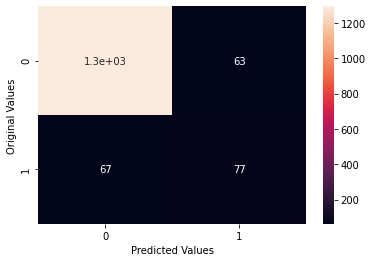

In [878]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_GNB)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

Again, its leaving 67 actually true customers as false which means we still need a better model.

In [879]:
#Precision Score
Pr_sc_GNB = precision_score(Y_test,Y_pred_GNB)
Pr_sc_GNB

0.55

In [880]:
#Recall Score
Rs_GNB = recall_score(Y_test, Y_pred_GNB)
Rs_GNB

0.5347222222222222

In [881]:
#F1 Score
F1_GNB = f1_score(Y_test,Y_pred_GNB)
F1_GNB

0.5422535211267606

In [882]:
#ROC Area under the curve score
R_Ar_GNB = roc_auc_score(Y_test,Y_pred_GNB)
R_Ar_GNB

0.7441310226155359

So, it performs better than Perceptron model but still there is scope of improvement. So, let us continue our search for the best model.

**(iii) Decision Tree Classifier Model**

Decision Tree classifier is a model in which it takes decision on basis of certain criterias.
For further understanding, kindly visit: https://scikit-learn.org/stable/modules/tree.html
For setting the maximum depth upto which the model must go, I tested with various values and found 7 to be the best.

In [883]:
#Building the model
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0, max_depth=7)

In [884]:
#Fitting the training set into the model
DTC.fit(X_train,Y_train['Personal Loan'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Let us see what conditions our computer has laid for making the predictions.

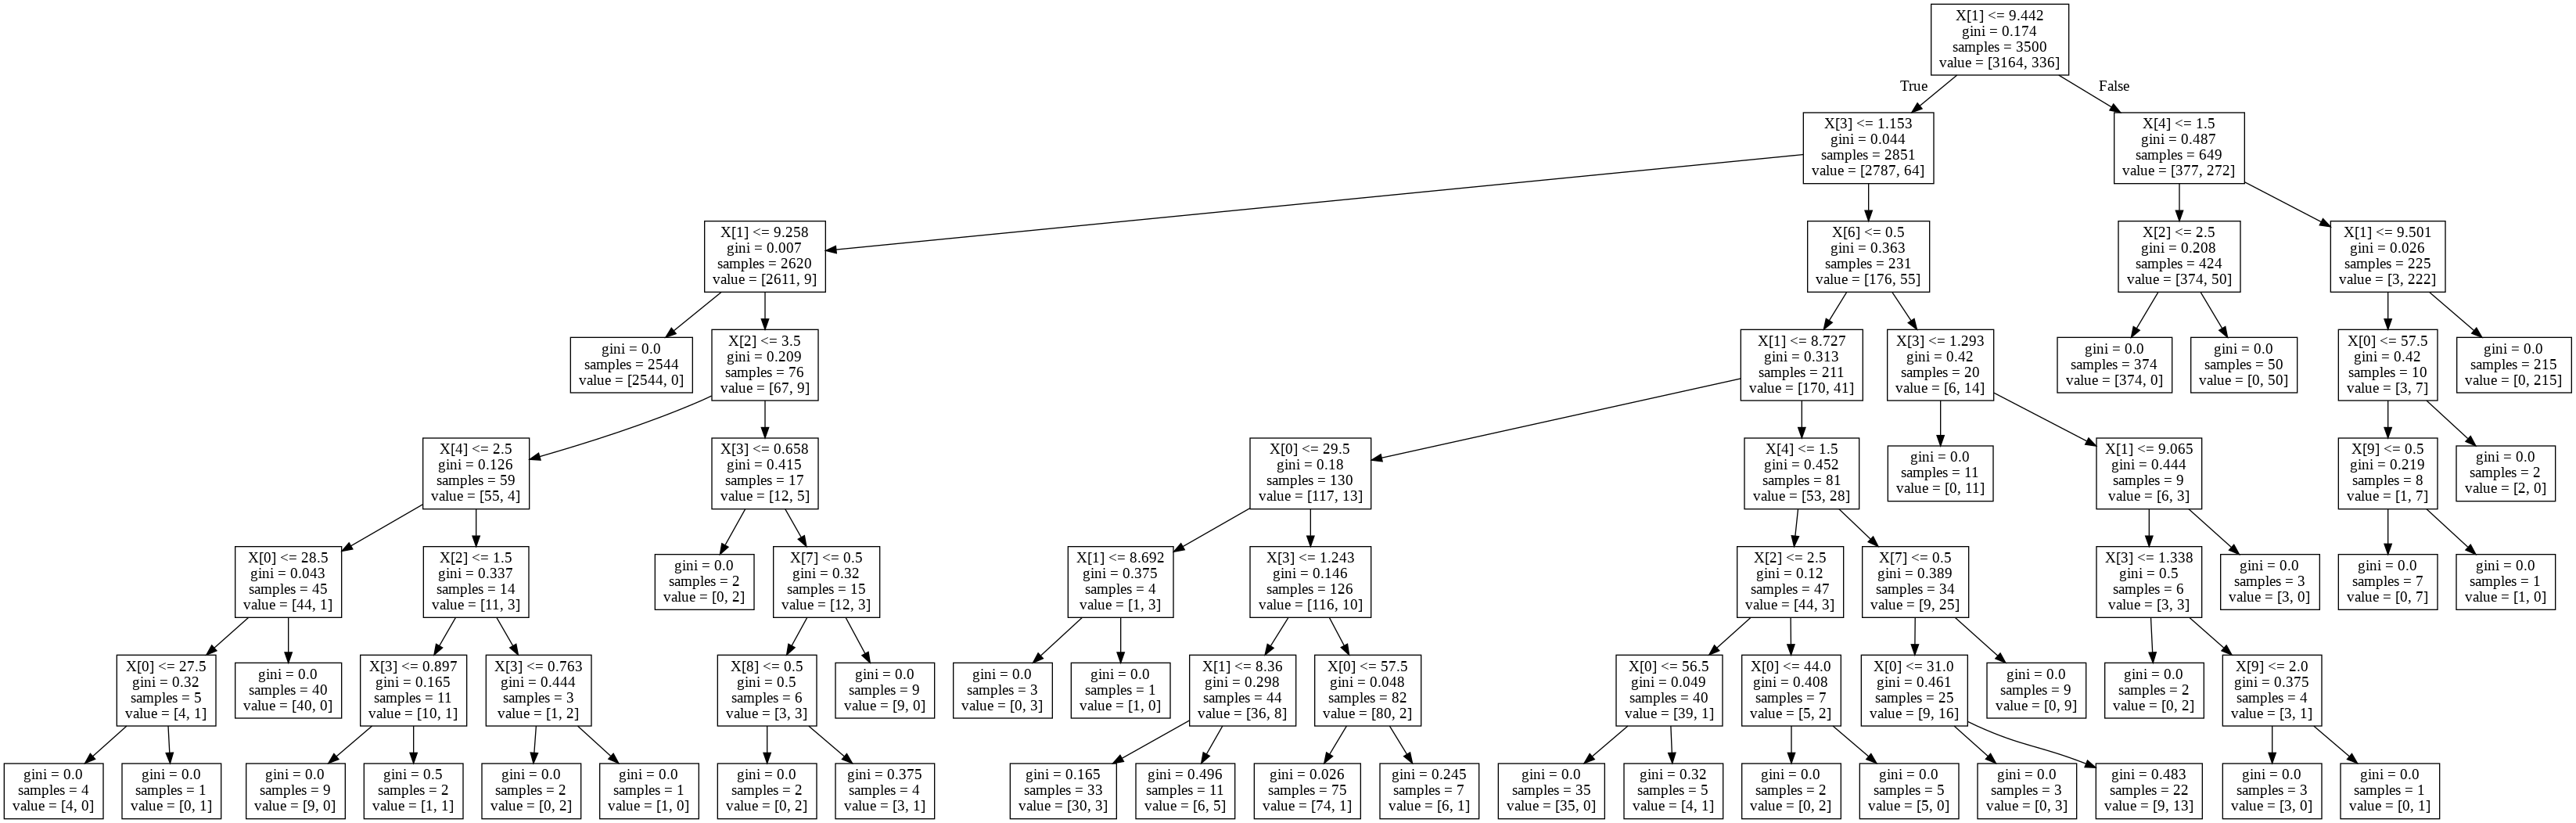

In [885]:
#Dotting the Graph
from sklearn import tree
dot_data=tree.export_graphviz(DTC,out_file=None)

#Drawing the graph
import pydotplus as pdp
from IPython.display import Image
graph = pdp.graph_from_dot_data(dot_data)
Image(graph.create_png())

So, this is the logic which our machine has learnt. You may zoom the image by double clicking and see if you want to.

In [886]:
#Predicting the results with test set
Y_pred_DTC=DTC.predict(X_test)

In [887]:
#Accuracy score of test set
acc_DTC = accuracy_score(Y_test,Y_pred_DTC)
acc_DTC

0.982

In [888]:
#Accuracy score of training set
y_pred_DTC_train = DTC.predict(X_train)
acc_DTC_train = accuracy_score(Y_train,y_pred_DTC_train)
acc_DTC_train

0.9937142857142857

So, its probably predicting quite well.

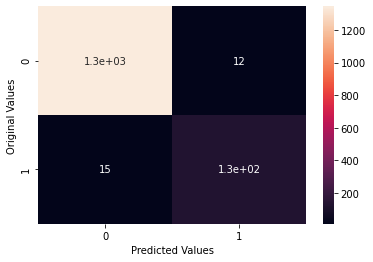

In [889]:
#Confusion Matrix
cm =confusion_matrix(Y_test,Y_pred_DTC)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

So, it's working out quite well as it has reduced number of False negative to 15.

In [890]:
#Precision Score
Pr_sc_DTC = precision_score(Y_test,Y_pred_DTC)
Pr_sc_DTC

0.9148936170212766

In [891]:
#Recall Score
Rs_DTC = recall_score(Y_test,Y_pred_DTC)
Rs_DTC

0.8958333333333334

In [892]:
#F1 Score
F1_DTC = f1_score(Y_test,Y_pred_DTC)
F1_DTC

0.9052631578947369

In [893]:
#ROC Area under the curve score
R_Ar_DTC = roc_auc_score(Y_test,Y_pred_DTC)
R_Ar_DTC

0.9434918879056048

So, this is working quite well and much better than previous models. But, let us still continue our hunt, maybe we will end up getting something better.

**(iv) K-Nearest Neighbour Classifier Model**

KNN Classifier works on the basis of nearest distance and nearest neighbours and hence classifying the data into subgroups which results in predictions. For further understanding, kindly visit: https://scikit-learn.org/stable/modules/neighbors.html
I tried various values of K i.e., n_neighbors and found 5 to be the most suitable in this case.

In [894]:
#Building the model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

In [895]:
#Fitting the model with training set
KNN.fit(X_train,Y_train['Personal Loan'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [896]:
#Making predictions with test set
Y_pred_KNN=KNN.predict(X_test)

In [897]:
#Accuracy of test set
acc_KNN = accuracy_score(Y_test,Y_pred_KNN)
acc_KNN

0.962

In [898]:
#Accuracy of training set
Y_pred_KNN_train = KNN.predict(X_train)
acc_KNN_train = accuracy_score(Y_train,Y_pred_KNN_train)
acc_KNN_train

0.9651428571428572

It too seems to work well.

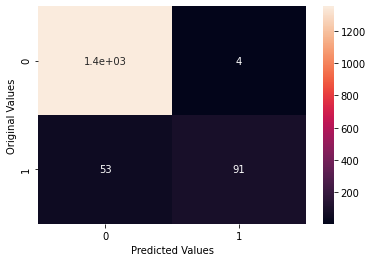

In [899]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_KNN)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

It may be having high accuracy but it has 53 such values which are actually true but it predicted them as false. So, we need to choose a better model which works better in our case.

In [900]:
#Precision Score
Pr_sc_KNN = precision_score(Y_test, Y_pred_KNN)
Pr_sc_KNN

0.9578947368421052

In [901]:
#Recall Score
Rs_KNN = recall_score(Y_test,Y_pred_KNN)
Rs_KNN

0.6319444444444444

In [902]:
#F1 Score
F1_KNN = f1_score(Y_test,Y_pred_KNN)
F1_KNN

0.7615062761506275

In [903]:
#ROC Area under the curve score
R_Ar_KNN = roc_auc_score(Y_test,Y_pred_KNN)
R_Ar_KNN

0.8144972959685348

So, it may be working well but it does not suit much to our case.

**(v) Neural Networks Classifier - MLP Classifier**

It is a classifier which is a step towards AI. In this we will be using Multi - Linear Perceptron(MLP) Classifier. For more understanding, kindly visit: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [904]:
#Building the model
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=0,max_iter=300)

In [905]:
#Fitting the Model with training set
MLP.fit(X_train,Y_train['Personal Loan'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [906]:
#Predicting the results with test set
Y_pred_MLP=MLP.predict(X_test)

In [907]:
#Accuracy of test set
acc_MLP = accuracy_score(Y_test,Y_pred_MLP)
acc_MLP

0.9773333333333334

In [908]:
#Accuracy of training set
Y_pred_MLP_train = MLP.predict(X_train)
acc_MLP_train = accuracy_score(Y_train,Y_pred_MLP_train)
acc_MLP_train

0.9791428571428571

So, it seems to be working quite well.

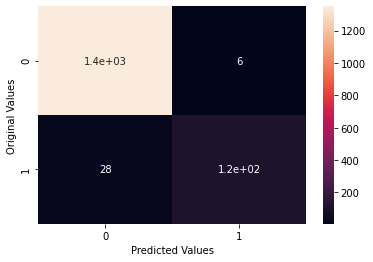

In [909]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_MLP)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

So, it is working well but it has 28 False negative values.

In [910]:
#Precision Score
Pr_sc_MLP = precision_score(Y_test,Y_pred_MLP)
Pr_sc_MLP

0.9508196721311475

In [911]:
#Recall Score
Rs_MLP = recall_score(Y_test, Y_pred_MLP)
Rs_MLP

0.8055555555555556

In [912]:
#F1 Score
F1_MLP = f1_score(Y_test,Y_pred_MLP)
F1_MLP

0.8721804511278195

In [913]:
#ROC Area under the curve score
R_Ar_MLP = roc_auc_score(Y_test,Y_pred_MLP)
R_Ar_MLP

0.9005653883972468

It is working well but still there maybe some models working better.

**(vi) Support Vector Machine Classifier Model**

They are supervised learning models which are used to predict results. For further understanding, kindly visit: https://scikit-learn.org/stable/modules/svm.html

In [914]:
#Building the model
from sklearn.svm import SVC
SVM = SVC(random_state=0,gamma='auto')

In [915]:
#Fitting the model with Training set
SVM.fit(X_train,Y_train['Personal Loan'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [916]:
#Predicting the results with Test set
Y_pred_SVM=SVM.predict(X_test)

In [917]:
#Accuracy Score of test set
acc_SVM = accuracy_score(Y_test,Y_pred_SVM)
acc_SVM

0.9726666666666667

In [918]:
#Accuracy Score of training set
Y_pred_SVM_train = SVM.predict(X_train)
acc_SVM_train = accuracy_score(Y_train,Y_pred_SVM_train)
acc_SVM_train

0.9771428571428571

It is predicting well.

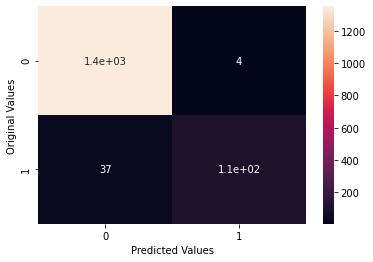

In [919]:
#Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_SVM)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

So, it is predicting well but it has 37 False negatives.

In [920]:
#Precision Score
Pr_sc_SVM = precision_score(Y_test,Y_pred_SVM)
Pr_sc_SVM

0.963963963963964

In [921]:
#Recall Score
Rs_SVM=recall_score(Y_test,Y_pred_SVM)
Rs_SVM

0.7430555555555556

In [922]:
#F1 Score
F1_SVM=f1_score(Y_test,Y_pred_SVM)
F1_SVM

0.8392156862745098

In [923]:
#ROC Area under the curve Score
R_Ar_SVM=roc_auc_score(Y_test,Y_pred_SVM)
R_Ar_SVM

0.8700528515240904

So, it is working well but still we need a better model.

**(vii) Random Forest Classifier**

It is an ensembling technique based model which creates logics based on a number of models and hence, the predictions are more reliable. For further understanding, kindly visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

On comparing various values of max_depth and n_estimators, I have found n_estimators to be 350 and max_depth as 7 to be best suited in this case.

In [924]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0,max_depth=7,n_estimators=350)

In [925]:
#Fitting the model with training set
RFC.fit(X_train,Y_train['Personal Loan'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [926]:
#Predicting the results with test set
Y_pred_RFC=RFC.predict(X_test)

In [927]:
#Accuracy score of test set
acc_RFC = accuracy_score(Y_test,Y_pred_RFC)
acc_RFC

0.9873333333333333

In [928]:
#Accuracy score of training set
Y_pred_RFC_train = RFC.predict(X_train)
acc_RFC_train = accuracy_score(Y_train, Y_pred_RFC_train)
acc_RFC_train

0.994

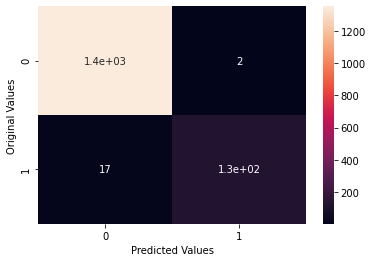

In [929]:
#Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_RFC)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [930]:
#Precision Score
Pr_sc_RFC = precision_score(Y_test,Y_pred_RFC)
Pr_sc_RFC

0.9844961240310077

In [931]:
#Recall score
Rs_RFC = recall_score(Y_test, Y_pred_RFC)
Rs_RFC

0.8819444444444444

In [932]:
#F1 Score
F1_RFC = f1_score(Y_test,Y_pred_RFC)
F1_RFC

0.9304029304029303

In [933]:
#ROC Area under the curve score
R_Ar_RFC = roc_auc_score(Y_test,Y_pred_RFC)
R_Ar_RFC

0.9402347590953786

So far, it seems to be the best method based on all the values. But still let us look at other Ensembling techniques.

**(viii) Bagging Ensemble Classifier Model**

It is based on bagging ensembling technique which increases reliability of predictions. For further understanding, kindly visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [934]:
#Building the model
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(random_state=0)

In [935]:
#Fitting the model with training set
Bag.fit(X_train,Y_train['Personal Loan'])

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False)

In [936]:
#Predicting results with test set
Y_pred_Bag=Bag.predict(X_test)

In [937]:
#Accuracy score of test set
acc_Bag = accuracy_score(Y_test,Y_pred_Bag)
acc_Bag

0.9853333333333333

In [938]:
#Accuracy score of training set
Y_pred_Bag_train = Bag.predict(X_train)
acc_Bag_train = accuracy_score(Y_train,Y_pred_Bag_train)
acc_Bag_train

0.9985714285714286

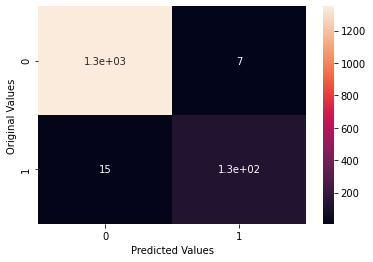

In [939]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_Bag)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

So, it is also working quite well.

In [940]:
#Precision Score
Pr_sc_Bag = precision_score(Y_test,Y_pred_Bag)
Pr_sc_Bag

0.9485294117647058

In [941]:
#Recall Score
Rs_Bag = recall_score(Y_test,Y_pred_Bag)
Rs_Bag

0.8958333333333334

In [942]:
#F1 Score
F1_Bag = f1_score(Y_test,Y_pred_Bag)
F1_Bag

0.9214285714285715

In [943]:
#ROC Area under the curve score
R_Ar_Bag = roc_auc_score(Y_test,Y_pred_Bag)
R_Ar_Bag

0.9453355457227139

It is also working well.

**(ix) Ada Boost Classifier Model**

It is model based on ensembling technique. For Better understanding, kindly visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

I tried various values of n_estimators and found 100 to be best suited to our model.

In [944]:
#Buidling the model
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(random_state=0,n_estimators=100)

In [945]:
#Fitting the model with training set
Ada.fit(X_train,Y_train['Personal Loan'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [946]:
#Predicting the results with test set
Y_pred_Ada=Ada.predict(X_test)

In [947]:
#Accuracy of Test set
acc_Ada = accuracy_score(Y_test,Y_pred_Ada)
acc_Ada

0.974

In [948]:
#Accuracy of training set
Y_pred_Ada_train = Ada.predict(X_train)
acc_Ada_train = accuracy_score(Y_train,Y_pred_Ada_train)
acc_Ada_train

0.9762857142857143

It is working well.

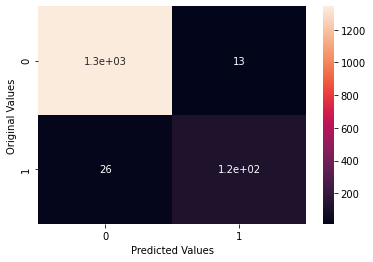

In [949]:
#Confusion Matrix
cm =confusion_matrix(Y_test,Y_pred_Ada)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

It may be working well but it doesn't suit our case as it has 31 False negatives.

In [950]:
#Precision Score
Pr_sc_Ada = precision_score(Y_test,Y_pred_Ada)
Pr_sc_Ada

0.9007633587786259

In [951]:
#Recall Score
Rs_Ada = recall_score(Y_test,Y_pred_Ada)
Rs_Ada

0.8194444444444444

In [952]:
#F1 score
F1_Ada = f1_score(Y_test,Y_pred_Ada)
F1_Ada

0.858181818181818

In [953]:
#ROC Area under the curve score
R_Ar_Ada = roc_auc_score(Y_test,Y_pred_Ada)
R_Ar_Ada

0.9049287118977384

It is working well but not much suited to our case.

**(x)Gradient Boosting Classifier**

It is an ensembling technique which is used to increase predicting efficiency. For further understanding, kindly visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

I tried various values of n_estimators and found 100 to be best suited to our model.

In [954]:
#Building the model
from sklearn.ensemble import GradientBoostingClassifier 
GB = GradientBoostingClassifier(random_state=0,n_estimators=100)

In [955]:
#Fitting the model with training set
GB.fit(X_train, Y_train['Personal Loan'])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [956]:
#Predicting the results with test set
Y_pred_GB=GB.predict(X_test)

In [957]:
#Accuracy score of test set
acc_GB = accuracy_score(Y_test,Y_pred_GB)
acc_GB

0.9853333333333333

In [958]:
#Accuracy score of training set
Y_pred_GB_train = GB.predict(X_train)
acc_GB_train = accuracy_score(Y_train,Y_pred_GB_train)
acc_GB_train

0.9968571428571429

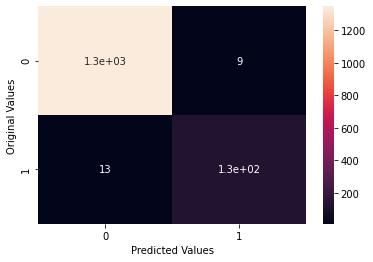

In [959]:
#Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred_GB)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [960]:
#Precision Score
Pr_sc_GB = precision_score(Y_test,Y_pred_GB)
Pr_sc_GB

0.9357142857142857

In [961]:
#Recall Score
Rs_GB = recall_score(Y_test,Y_pred_GB)
Rs_GB

0.9097222222222222

In [962]:
#F1 score
F1_GB = f1_score(Y_test,Y_pred_GB)
F1_GB

0.9225352112676057

In [963]:
#ROC Area under the score
R_Ar_GB = roc_auc_score(Y_test,Y_pred_GB)
R_Ar_GB

0.9515425270403147

It is working well.

**Step 13: Comparing the Models**

Now that we have seen and built various models, let us compare the models and choose the best one for our case.

(i) Accuracies of Test sets of Models

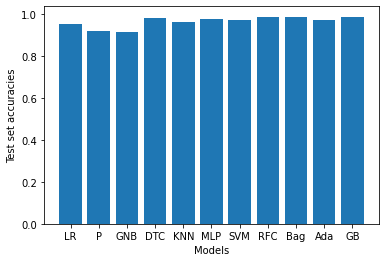

In [964]:
#Plotting Bar Graph
labels=['LR','P','GNB','DTC','KNN','MLP','SVM','RFC','Bag','Ada','GB']
Acc_Test=[acc_LR,acc_P,acc_GNB,acc_DTC,acc_KNN,acc_MLP,acc_SVM,acc_RFC,acc_Bag,acc_Ada,acc_GB]
plt.bar(labels,Acc_Test)
plt.xlabel('Models')
plt.ylabel('Test set accuracies')
plt.show()

(ii) Accuracies of Training sets of Models

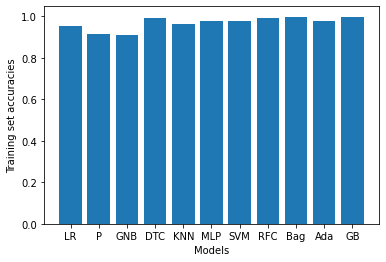

In [965]:
#Plotting Bar Graph
Acc_Train=[acc_LR_train,acc_P_train,acc_GNB_train,acc_DTC_train,acc_KNN_train,acc_MLP_train,acc_SVM_train,acc_RFC_train,acc_Bag_train,acc_Ada_train,acc_GB_train]
plt.bar(labels,Acc_Train)
plt.xlabel('Models')
plt.ylabel('Training set accuracies')
plt.show()

(iii) Precision Scores of Models

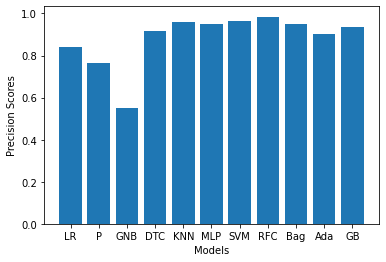

In [966]:
#Plotting Bar Graph
PS=[Pr_sc_LR,Pr_sc_P,Pr_sc_GNB,Pr_sc_DTC,Pr_sc_KNN,Pr_sc_MLP,Pr_sc_SVM,Pr_sc_RFC,Pr_sc_Bag,Pr_sc_Ada,Pr_sc_GB]
plt.bar(labels,PS)
plt.xlabel('Models')
plt.ylabel('Precision Scores')
plt.show()

(iv) Recall Scores of Models

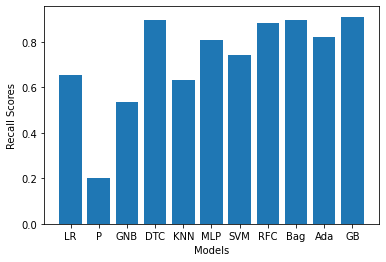

In [967]:
#Plotting Bar Graph
RS=[Rs_LR,Rs_P,Rs_GNB,Rs_DTC,Rs_KNN,Rs_MLP,Rs_SVM,Rs_RFC,Rs_Bag,Rs_Ada,Rs_GB]
plt.bar(labels,RS)
plt.xlabel('Models')
plt.ylabel('Recall Scores')
plt.show()

(v) F1 Scores of Models

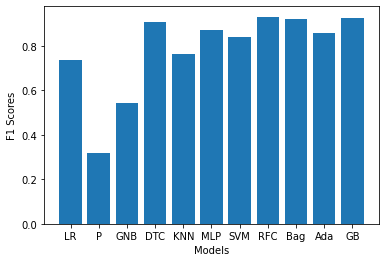

In [968]:
#Plotting Bar Graph
F1S=[F1_LR,F1_P,F1_GNB,F1_DTC,F1_KNN,F1_MLP,F1_SVM,F1_RFC,F1_Bag,F1_Ada,F1_GB]
plt.bar(labels,F1S)
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.show()

(vi) ROC Area Under the Curve Scores of Models

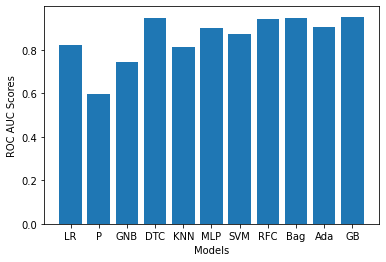

In [969]:
#Plotting Bar Graph
ROC=[R_Ar_LR,R_Ar_P,R_Ar_GNB,R_Ar_DTC,R_Ar_KNN,R_Ar_MLP,R_Ar_SVM,R_Ar_RFC,R_Ar_Bag,R_Ar_Ada,R_Ar_GB]
plt.bar(labels,ROC)
plt.xlabel('Models')
plt.ylabel('ROC AUC Scores')
plt.show()

So, on the basis of the above comparisions, we can conclude that Random Forest Classifier is working the best for our case and hence, we should use it for the purpose of prediction.

**Business Understanding of the Project**

From this very interesting project and the analysis, we can conclude the following points:


*   The Dataset provided to us had no null values.
*   It had the data of 5000 customers.
*   ID's of customers had nothing to do with the loan.
*   The Experience and Age columns were highly correlated.
*   The Experience Column had faulty data i.e., it had negative values.
*   Maximum number of customers live alone.
*   Maximum number of customers are graduates.
*   9.6% of customers took loan in the last session.
*   10.44% customers have security accounts with the bank.
*   6.04% customers have Certificate of Deposit Accounts with the bank.
*   59.68% customers use Online Facilities.
*   29.4% customers have credit cards issued by Universal Bank.
*   Number of customers decrease as Income increases.
*   Many cutomers have low average credit card spending per month.
*   People with High education and High Income tend to take loan more.
*   People with security accounts tend to take loan less.
*   Mortgage, Income and Credit card average data is skewed highly.
*   Zipcodes had too many nominal data so it will not effect much to the prediction.
*   All the models seem to work well but we were required to choose model best suitable for our case, so we compared them and on comparision, found Random Forest Ensembling Classifier to be the best suited for our case. And its results seem highly promising.



**Sources:**


*   Wikipedia
*   scikit-learn.org
*   Internship Studio



Thank you!

-Saurabh Datta